In [2]:
%load_ext autoreload 
%autoreload 2

In [7]:
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from collections import OrderedDict
import re

from data.dataexploration import *

In [5]:
path = r"E:\ST-Net\data\hist2tscript\BRCA"

In [4]:
dico = common_genes(path)

100%|██████████| 23/23 [06:21<00:00, 16.58s/it]

68


Text(0.5, 0, 'Number of tissue in which present')

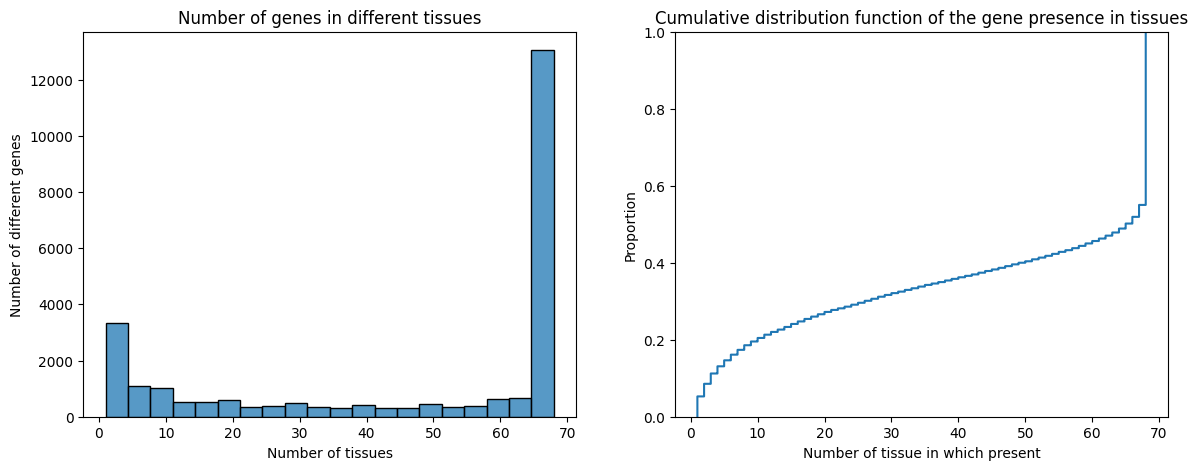

In [24]:
fig, axs = plt.subplots(1,2, figsize=(14,5))
sns.histplot(list(dico.values()), ax=axs[0])
axs[0].set_xlabel("Number of tissues")
axs[0].set_ylabel("Number of different genes")
axs[0].set_title("Number of genes in different tissues")

sns.ecdfplot(list(dico.values()), ax=axs[1])
axs[1].set_title("Cumulative distribution function of the gene presence in tissues")
axs[1].set_xlabel("Number of tissue in which present")

In [6]:
with open(path + r'\std_genes_avg.pkl', 'rb') as f:
    std_genes_avg = pkl.load(f)

with open(path + r'\std_genes.pkl', 'rb') as f:
    std_genes = pkl.load(f)

len(set(list(std_genes_avg[:1000].index)).intersection(set(list(std_genes[:1000].index))))

921

Text(0.5, 1.0, 'Distribution of the standard deviation among common genes')

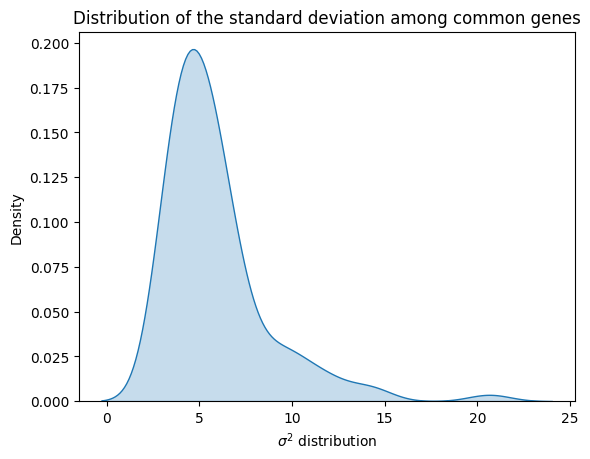

In [29]:
sns.kdeplot(std_genes_avg[:100], fill=True)
plt.xlabel("$\sigma^2$ distribution")
plt.title("Distribution of the standard deviation among common genes")

In [7]:
pd.DataFrame(std_genes_avg, )

,0
ENSG00000254709,20.647241
ENSG00000137818,14.505574
ENSG00000149273,13.991128
ENSG00000160180,12.535964
ENSG00000034510,11.891907
...,...
ENSG00000185973,0.073045
ENSG00000125551,0.072567
ENSG00000116771,0.070808
ENSG00000188295,0.069764


In [2]:
path = r"C:\Jérémie\Stage\IBENS\depo\data\df_sum.csv"
df = pd.read_csv(path, index_col=0)

In [14]:
df[std_genes_avg.index[:5]].head(10).to_csv(r"C:\Jérémie\Stage\IBENS\depo\data\wikitable_sum.csv")

In [2]:
path = r"C:\Jérémie\Stage\IBENS\depo"

In [3]:
df = pd.read_csv(path + r"\results\test_results.csv", index_col=0)

In [4]:
df.index.rename("Test patient", inplace=True)

In [6]:
df.mean()

test_loss    0.073674
r2_score     0.353087
pearson      0.630442
dtype: float64

### 1. Some descriptions about data

In [21]:
tumor_count = pd.read_csv("results/count_tumor.csv", index_col=0).rename({"0": "count"}, axis=1)
tumor_count["index"] = tumor_count.index
tumor_count.set_index(["index", "tumor"])

count
index   tumor       
BC23209 tumor    896
        non       46
BC23270 tumor    850
BC23803 tumor   1098
        non       65
BC24105 tumor    959
BC24220 tumor   1178
        non      117
BT23268 non     1166
        tumor    259
BT23269 tumor   1100
        non      202
BT23272 tumor   1134
        non      557
BT23277 tumor   1167
        non      415
BT23287 non      686
        tumor    261
BT23288 tumor   1290
        non      129
BT23377 tumor   1426
        non      458
BT23450 tumor    849
        non       86
BT23506 tumor   1385
        non       87
BT23508 tumor    863
        non      590
BT23567 non      890
        tumor    839
BT23810 tumor   1849
        non      249
BT23895 tumor   1403
        non       66
BT23901 non      300
        tumor    286
BT23903 non     1098
        tumor    273
BT23944 tumor   1037
        non      200
BT24044 non     1514
        tumor    212
BT24223 non      993
        tumor     99

### 2. Test results for DINO

In [28]:
dino_res = pd.read_csv('results/test_results_dino.csv', index_col=0)
dino_res

,test_loss,r2_score,pearson
BC23209,2.284794,0.586767,0.786281
BT23268,1.771720,0.682825,0.835359
BT23288,2.363985,0.569581,0.777701
BT23567,1.468273,0.731727,0.859021
BT23944,2.686517,0.509910,0.757282
BC23270,2.861039,0.478989,0.710608
BT23269,1.571260,0.717108,0.857110
BT23377,1.975282,0.641146,0.816392
BT23810,1.894832,0.656463,0.823708
BT24044,1.872090,0.662788,0.819825


In [38]:
print(dino_res.describe().to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  test\_loss &   r2\_score &    pearson \\
\midrule
count &  23.000000 &  23.000000 &  23.000000 \\
mean  &   2.068847 &   0.625742 &   0.805265 \\
std   &   0.367124 &   0.067618 &   0.036886 \\
min   &   1.468273 &   0.478989 &   0.710608 \\
25\%   &   1.797941 &   0.585887 &   0.781991 \\
50\%   &   2.007987 &   0.641146 &   0.816392 \\
75\%   &   2.293845 &   0.676025 &   0.832347 \\
max   &   2.861039 &   0.731727 &   0.859021 \\
\bottomrule
\end{tabular}



C:\Users\jerem\AppData\Local\Temp\ipykernel_13216\1751650458.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dino_res.describe().to_latex())


In [33]:
inception_res = pd.read_csv('results/test_results_inception.csv', index_col=0)
inception_res

,test_loss,r2_score,pearson
BC23209,0.078482,0.314663,0.619880
BT23268,0.062553,0.430912,0.674632
BT23288,0.086918,0.232073,0.561495
BT23567,0.060859,0.496973,0.724997
BT23944,0.081944,0.225315,0.572368
BC23270,0.084137,0.221141,0.529501
BT23269,0.057869,0.454126,0.697552
BT23377,0.070700,0.402031,0.653412
BT23810,0.071524,0.382080,0.643879
BT24044,0.072713,0.415980,0.660825


In [39]:
print(inception_res.describe().to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  test\_loss &   r2\_score &    pearson \\
\midrule
count &  23.000000 &  23.000000 &  23.000000 \\
mean  &   0.073674 &   0.353087 &   0.630442 \\
std   &   0.010807 &   0.091888 &   0.057729 \\
min   &   0.057869 &   0.211493 &   0.510663 \\
25\%   &   0.065499 &   0.269858 &   0.583568 \\
50\%   &   0.072713 &   0.378677 &   0.648481 \\
75\%   &   0.081262 &   0.409005 &   0.660881 \\
max   &   0.101218 &   0.496973 &   0.724997 \\
\bottomrule
\end{tabular}



C:\Users\jerem\AppData\Local\Temp\ipykernel_13216\4216385803.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(inception_res.describe().to_latex())


## StyleGAN results

1. StyleGAN without label

In [2]:
res = pd.read_json("results/metric-fid50k_StyleGAN1l.jsonl", lines=True)
res2 = pd.read_json("results/metric-fid50k_full_styleGAN69.jsonl", lines=True)

In [3]:
res2["res"] = res2["results"].apply(lambda x: list(x.values())[0])

Text(8, 0, '158.67')

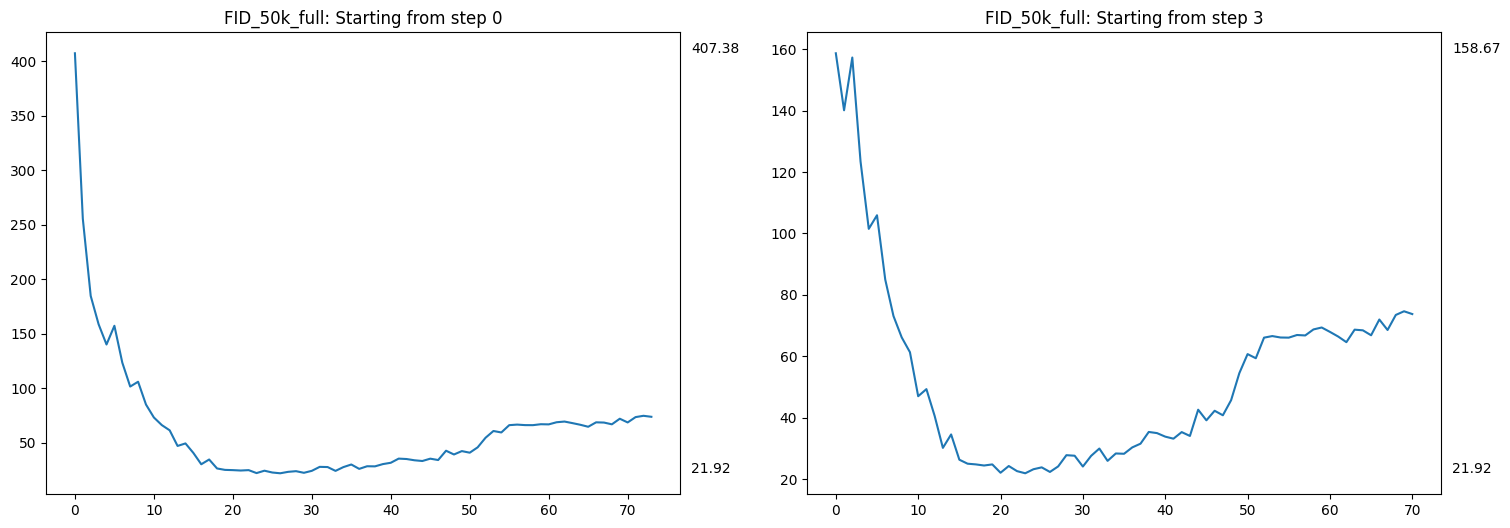

In [4]:
var = res2["res"].values
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes[0].plot(var)
axes[0].set_title("FID_50k_full: Starting from step 0")
axes[0].annotate('%0.2f' % var.min(), xy=(1, var.min()), xytext=(8, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')
axes[0].annotate('%0.2f' % var.max(), xy=(1, var.max()), xytext=(8, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')
axes[1].plot(var[3:])
axes[1].set_title("FID_50k_full: Starting from step 3")
axes[1].annotate('%0.2f' % var.min(), xy=(1, var.min()), xytext=(8, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')
axes[1].annotate('%0.2f' % var[3:].max(), xy=(1, var[3:].max()), xytext=(8, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')

In [6]:
path = r"C:\Jérémie\Stage\IBENS\Présentations\log_SG69.txt"

In [8]:
txt = open(path, "r").read()

In [21]:
li_reg_gen = re.findall("loss_reg_gen: (\d+.\d+)", txt)
li_reg_gen = [float(x) for x in li_reg_gen]
li_reg_real = re.findall("loss_reg_real: (\d+.\d+)", txt)
li_reg_real = [float(x) for x in li_reg_real]
li_reg_real

[6.825,
 1.555,
 2.399,
 2.19,
 9.496,
 6.505,
 1.957,
 7.453,
 2.669,
 3.199,
 4.547,
 2.65,
 5.482,
 10.356,
 1.162,
 4.389,
 2.632,
 3.123,
 4.074,
 4.795,
 3.085,
 9.061,
 6.236,
 5.886,
 2.833,
 2.557,
 4.949,
 6.033,
 3.814,
 1.509,
 2.786,
 6.487,
 4.773,
 1.513,
 2.694,
 7.296,
 3.104,
 6.952,
 1.321,
 3.182,
 3.101,
 9.924,
 3.026,
 3.804,
 1.926,
 1.711,
 1.486,
 3.839,
 3.301,
 6.02,
 2.14,
 6.574,
 1.34,
 1.999,
 19.044,
 1.941,
 2.034,
 2.199,
 1.297,
 5.46,
 1.826,
 2.195,
 2.093,
 2.831,
 2.181,
 6.155,
 2.726,
 2.138,
 3.008,
 2.359,
 1.759,
 0.939,
 1.541,
 9.449,
 2.61,
 3.181,
 2.953,
 6.061,
 3.41,
 1.733,
 2.152,
 3.162,
 0.912,
 1.125,
 1.715,
 5.004,
 3.777,
 2.046,
 1.919,
 4.582,
 2.014,
 3.735,
 3.728,
 2.077,
 3.672,
 1.823,
 2.851,
 1.082,
 4.63,
 4.196,
 2.312,
 5.867,
 2.359,
 4.114,
 10.944,
 2.642,
 4.132,
 2.326,
 2.726,
 2.742,
 2.728,
 3.282,
 3.141,
 2.914,
 4.734,
 5.085,
 3.353,
 2.233,
 2.672,
 1.226,
 3.708,
 2.5,
 3.176,
 3.965,
 2.812,
 1.466,


Text(0, 0.5, 'Loss')

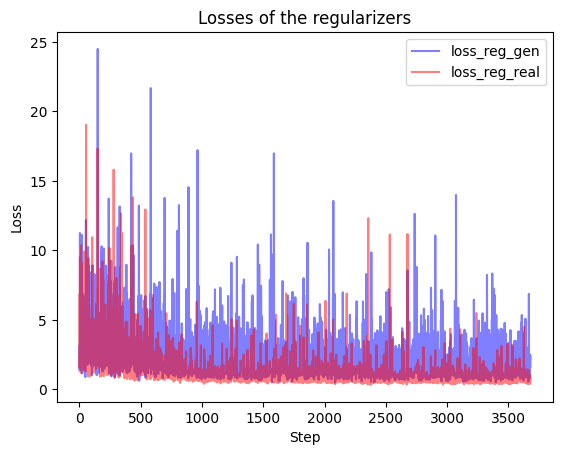

In [48]:
plt.plot(li_reg_gen, label="loss_reg_gen", color="blue", alpha=0.5)
plt.plot(li_reg_real, label="loss_reg_real", color="red", alpha=0.5)
plt.legend()
plt.title("Losses of the regularizers")
plt.xlabel("Step")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

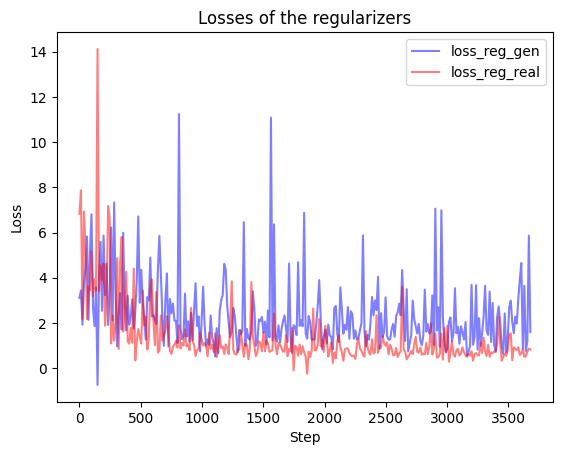

In [49]:
from scipy.interpolate import make_interp_spline
x = np.arange(0, len(li_reg_gen), 1)
y = li_reg_gen
y2 = li_reg_real
ynew = make_interp_spline(x, y, k=3)  # type: BSpline
ynew2 = make_interp_spline(x, y2, k=3)  # type: BSpline
xnew = np.linspace(x.min(), x.max(), 300)
plt.plot(xnew, ynew(xnew), label="loss_reg_gen", color="blue", alpha=0.5)
plt.plot(xnew, ynew2(xnew), label="loss_reg_real", color="red", alpha=0.5)
plt.legend()
plt.title("Losses of the regularizers")
plt.xlabel("Step")
plt.ylabel("Loss")